<a id="2"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Importing Libraries</h1>

In [231]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

<a id="3"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Importing Dataset</h1> 

In [232]:
from google.colab import files
uploaded = files.upload()

Saving lungCancer.csv to lungCancer (4).csv


In [233]:
url = "C:\Lung-Cancer-Detection-main\lungCancer.csv"
import io
dataset = pd.read_csv(io.BytesIO(uploaded['lungCancer.csv']))
# data = pd.read_csv(url)


<a id="4"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">EDA</h1> 

# EDA

Exploring data analysis

In [234]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [235]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [236]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [237]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

#There are no null values

In [238]:
dataset.shape

(309, 16)

In [239]:
dataset.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


<a id="5"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Data Visualization</h1>  

In [240]:
hist_data =[dataset["AGE"].values]
group_labels = ['AGE'] 
fig = plt.figure()
ax=ff.create_distplot(hist_data, group_labels)

ax.show()


<Figure size 640x480 with 0 Axes>

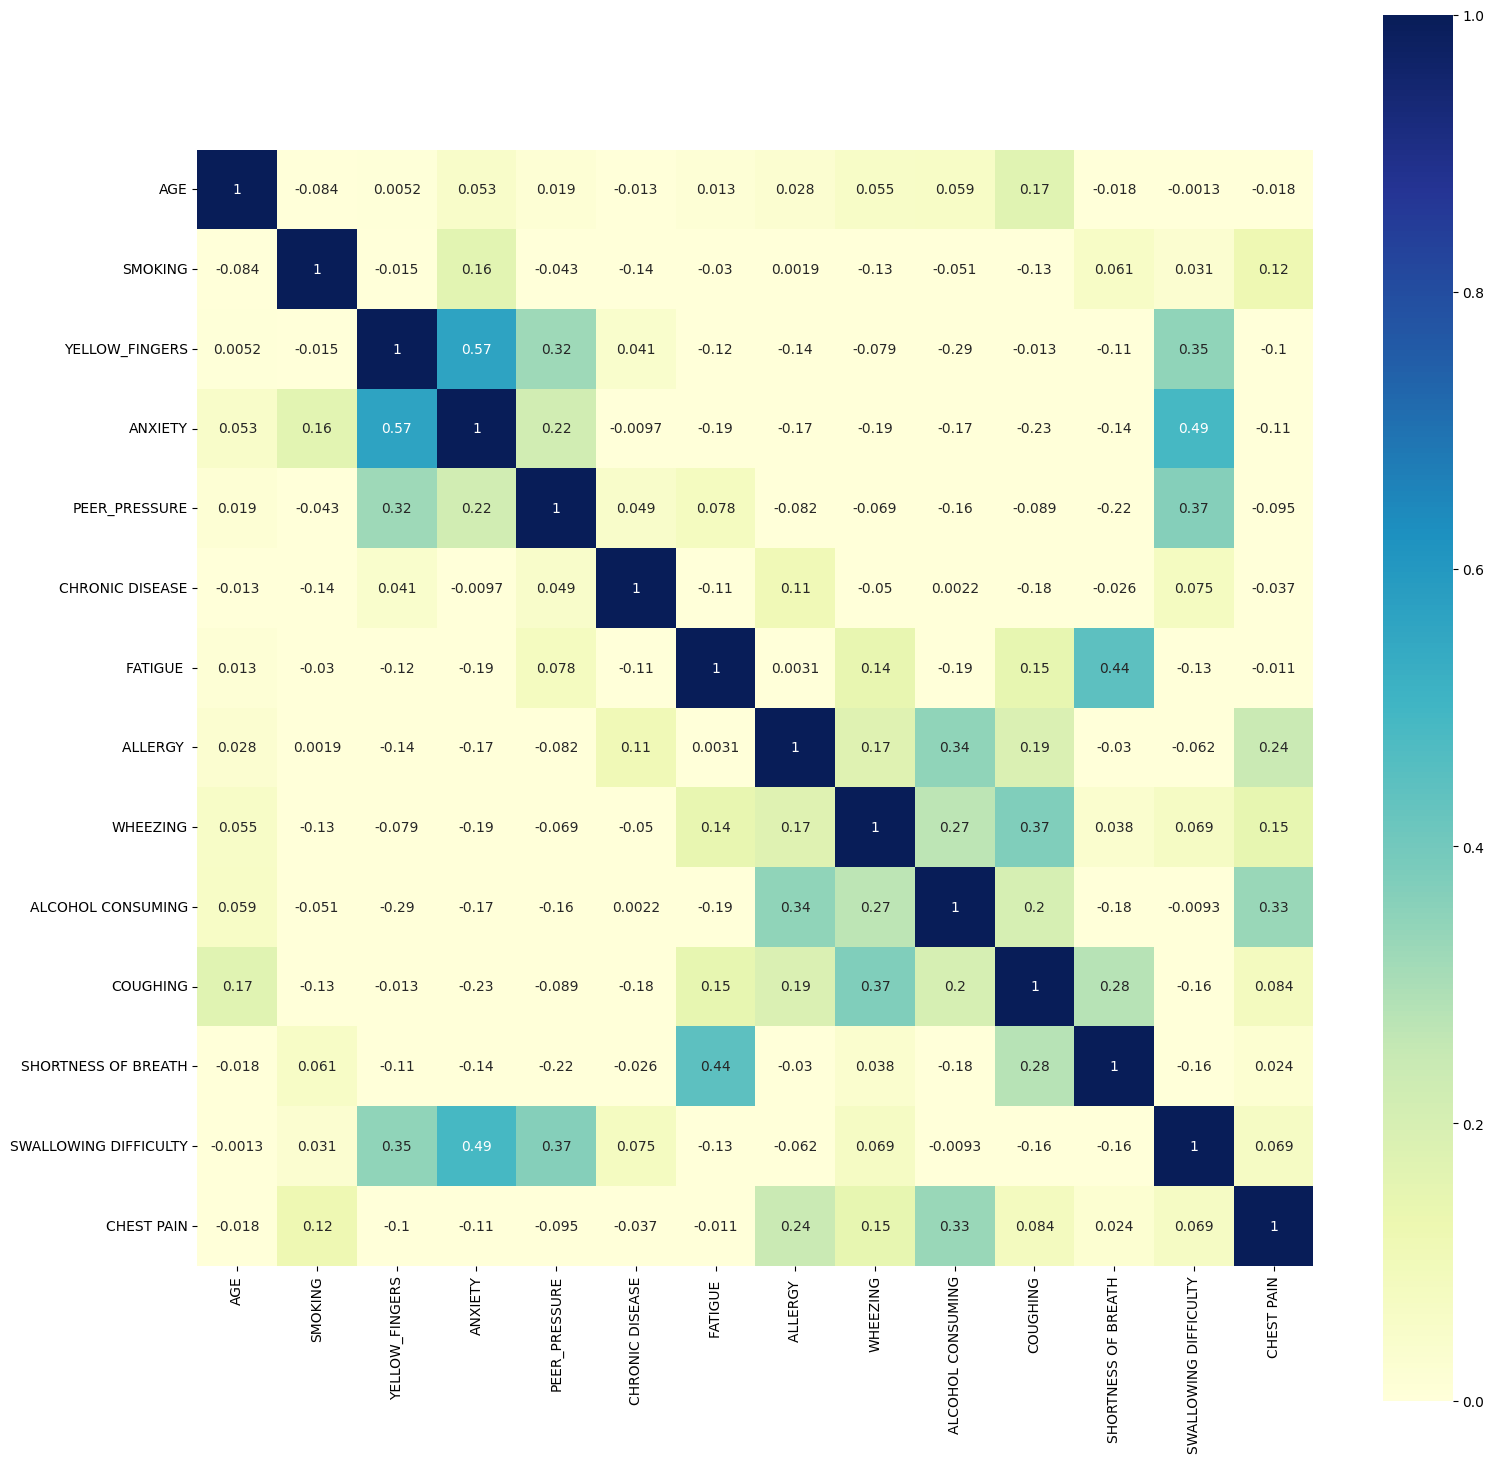

In [241]:
corrmat = dataset.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");
plt.savefig('Downloads\correlation_map.png')

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

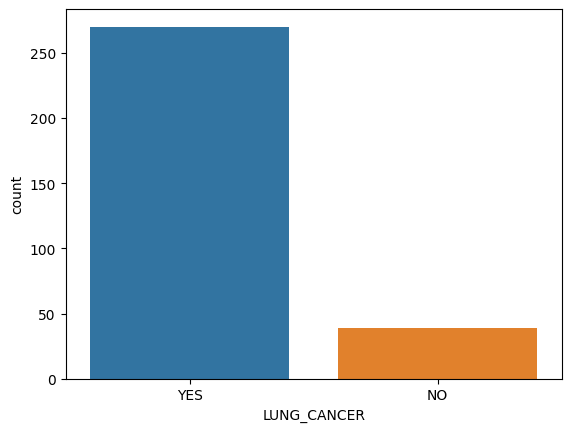

In [242]:
sns.countplot(x ='LUNG_CANCER',data = dataset)


<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

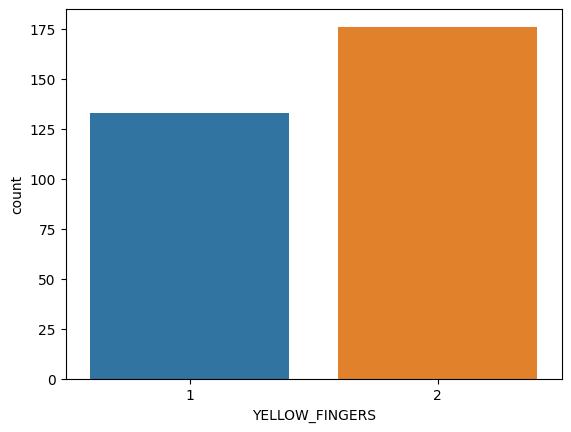

In [243]:
sns.countplot(x = 'YELLOW_FINGERS',data = dataset)

In [244]:
dataset['ANXIETY'].unique()

array([2, 1])

unique values

In [245]:
dataset['PEER_PRESSURE'].unique()

array([1, 2])

unique values

<Axes: xlabel='CHRONIC DISEASE', ylabel='count'>

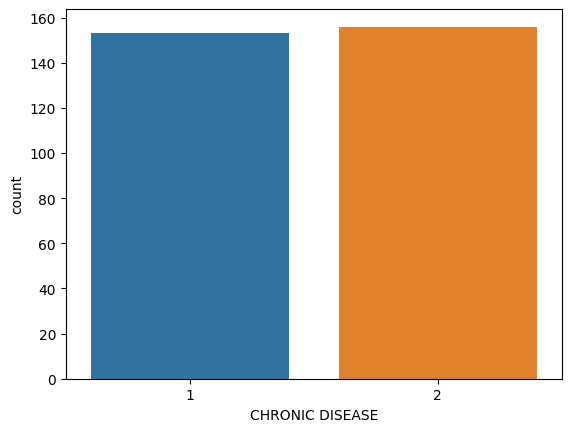

In [246]:
sns.countplot(x = 'CHRONIC DISEASE',data = dataset)

In [247]:
dataset['YELLOW_FINGERS'].unique()

array([2, 1])

unique values

# Label encoding categorical variables

In [249]:
le = preprocessing.LabelEncoder()
dataset['GENDER'] = le.fit_transform(dataset['GENDER'])
dataset['LUNG_CANCER'] = le.fit_transform(dataset['LUNG_CANCER'])

#GENDER 1 = Male 0 = Female LUNG CANCER 1 = YES 0 = NO

In [250]:
dataset['GENDER']

0      1
1      1
2      0
3      1
4      0
      ..
304    0
305    1
306    1
307    1
308    1
Name: GENDER, Length: 309, dtype: int64

In [251]:
dataset['LUNG_CANCER']

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [252]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [253]:
print(dataset.corr()["LUNG_CANCER"].abs().sort_values(ascending=False))

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


# Feature Selection based on correlation

In [254]:
X = dataset.drop(['AGE','GENDER','SHORTNESS OF BREATH','SMOKING','LUNG_CANCER'],axis=1)

In [255]:
X

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,2,1,1,2,1,2,2,2,2,2
1,1,1,1,2,2,2,1,1,1,2,2
2,1,1,2,1,2,1,2,1,2,1,2
3,2,2,1,1,1,1,1,2,1,2,2
4,2,1,1,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,2,2,2,1,1,2,2,2,1
305,1,1,1,1,2,2,2,2,2,1,2
306,1,1,1,1,1,2,2,2,2,1,2
307,1,2,1,1,2,2,1,2,2,1,2


In [256]:
y = dataset['LUNG_CANCER']

In [257]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

<a id="6"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Model Building</h1>   

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

- Support Vector Machine
- Random Forest Classifier
- KNeighborsClassifier
- Ann
- Voting Classifier
- Stacking Classifier
- Logistic Regression
- Decision Tree


# Random Forest Classifier

In [259]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X, y)
predictions = RF.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val1, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  96.7741935483871 

*Confusion Matrix for RF: 
[[ 9  1]
 [ 1 51]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [318]:
y_pred_rf = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
#The recall is the measure of our model correctly identifying True Positives. Thus
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
#Precision is the ratio between the True Positives and all the Positives
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

Accuracy : 0.967741935483871


(0.9, 0.15)

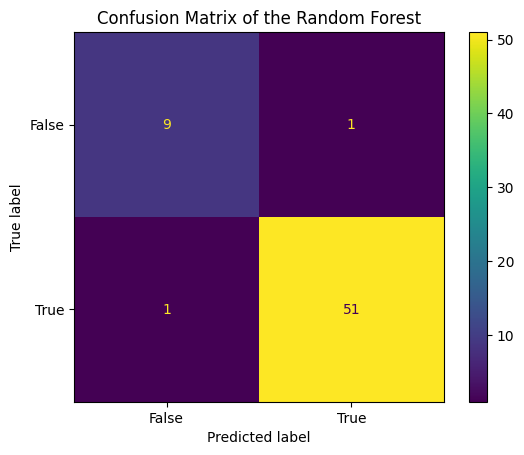

In [319]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix of the Random Forest")
plt.show()

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(random_state=0)
tr.fit(X, y)
predictions = tr.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Decision Tree: ", val2, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Decision Tree: ")
print(classification_report(y_test, predictions))

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm
dc_result = accuracy_score(y_test,predictions)
print("Accuracy :",dc_result)
recall_dc = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dc = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dc,precision_dc

In [ ]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix of the Dession Tree")
plt.show()

# Logistic Regression

In [261]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Logistic Regression: ", val3, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_test, predictions))

*Accuracy score for Logistic Regression:  91.93548387096774 

*Confusion Matrix for Logistic Regression: 
[[ 6  4]
 [ 1 51]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.93      0.98      0.95        52

    accuracy                           0.92        62
   macro avg       0.89      0.79      0.83        62
weighted avg       0.92      0.92      0.91        62



In [297]:
y_pred_log = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
cm
log_result = accuracy_score(y_test,y_pred_log)
print("Accuracy :",log_result)
recall_log = cm[0][0]/(cm[0][0] + cm[0][1])
precision_log = cm[0][0]/(cm[0][0]+cm[1][1])
recall_log,precision_log

Accuracy : 0.9193548387096774


(0.6, 0.10526315789473684)

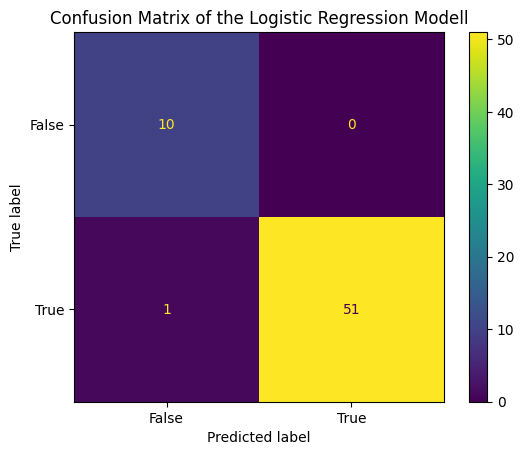

In [305]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix of the Logistic Regression Modell")
plt.show()

#Polynomial Features

In [324]:
import operator

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
poly = PolynomialFeatures(3)

x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
predictions = model.predict(x_test_poly)
val4 = r2_score(y_test,predictions)*100

print('Polynomial Score = ', val4)

Polynomial Score =  49.36013782673518


In [332]:
pf_result = val4/100
print("Accuracy :", pf_result)
recall_pf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_pf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_pf,precision_pf

Accuracy : 0.49360137826735184


(0.9, 0.15)

# MLP Classifier

In [333]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(25,11,7,5,3,)) # Random state number is a random method, 42 is most popular
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
val5 = mlp.score(X_test,y_test)*100
print('MLPClassifier Score = ',val5) 

MLPClassifier Score =  83.87096774193549


In [334]:
MLP_result = val5/100
print("Accuracy :",MLP_result)
recall_MLP = cm[0][0]/(cm[0][0] + cm[0][1])
precision_MLP = cm[0][0]/(cm[0][0]+cm[1][1])
recall_MLP,precision_MLP

Accuracy : 0.8387096774193549


(0.9, 0.15)

# Accuracy Comparison

In [335]:
score = [val1,val2,val3,val4,val5]
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','Logistic Regression',' Polynomial Features',' MLPClassifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[96.7741935483871, 91.93548387096774, 98.38709677419355, 49.36013782673518, 83.87096774193549]


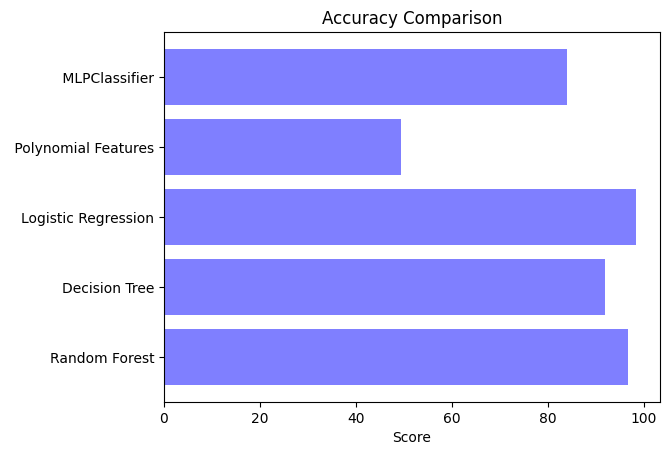

In [336]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()


In [337]:
results ={'Accuracy': [rf_result*100,dc_result*100,log_result*100,pf_result*100,MLP_result*100],
 'Recall':[recall_rf*100,recall_dc*100,recall_log*100,recall_pf*100,recall_MLP*100],
 'Precision': [precision_rf*100,precision_dc*100,precision_log*100,precision_pf*100,precision_MLP*100]}
index = ['Random Forest','Logistic Regression','Decision Tree','Polynomial Features','MLP Classifier']

In [338]:
results =pd.DataFrame(results,index=index)

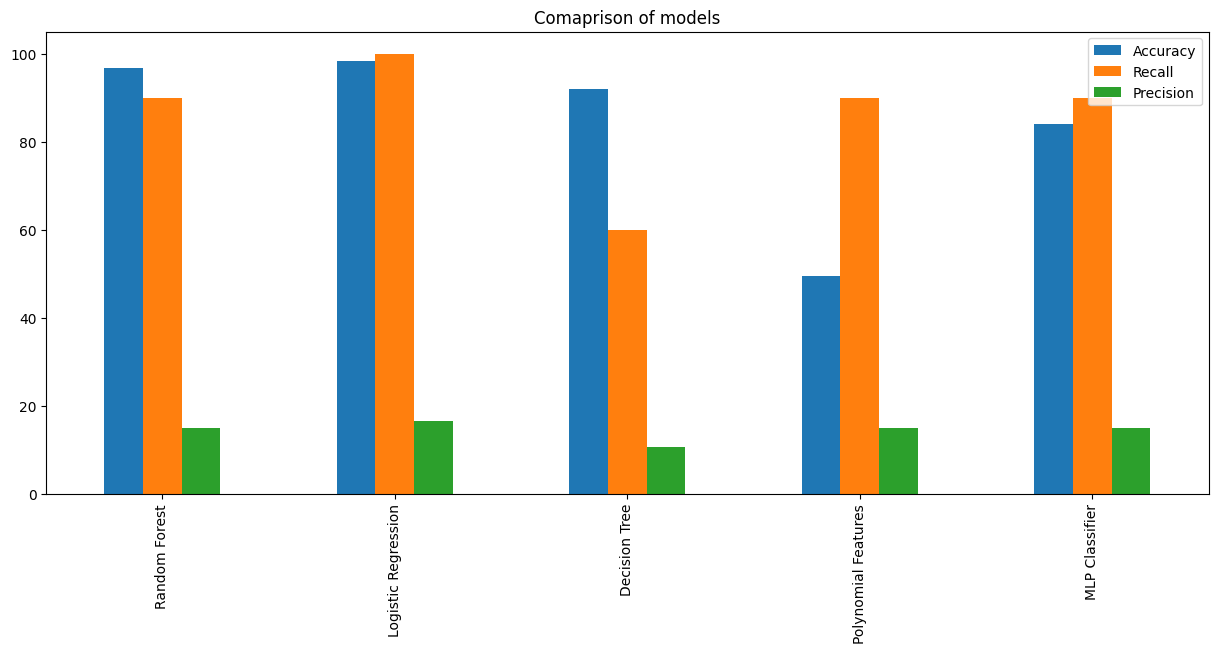

In [339]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(15,6)).get_figure()
fig.savefig('acc.png')